In [1]:
# Step 1: Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
# Step 2: Data Collection
# Load the dataset
file_path = r"C:\Users\Lenovo\OneDrive\Desktop\DS projects\Heart Disease Diagnostic Analysis\Heart Disease data.csv"
data = pd.read_csv(file_path)

In [3]:
# Step 3: Exploratory Data Analysis (EDA)
# Display the first few rows of the dataset
print(data.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [4]:
# Step 4: Data Cleaning
# Check for missing values
missing_values = data.isnull().sum()
print(f"Missing Values:\n{missing_values}")

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Duplicates: {duplicates}")

Duplicates: 723


In [6]:
# Data types and basic info
data_info = data.info()
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [7]:
# Remove duplicates
data_cleaned = data.drop_duplicates()

In [8]:
# Verify the shape of the cleaned dataset
print(f"Shape of cleaned data: {data_cleaned.shape}")

Shape of cleaned data: (302, 14)


In [9]:
# Step 5: Feature Engineering and Transformation
# Separating features and target variable
X = data_cleaned.drop(columns=['target'])
y = data_cleaned['target']

# Define column transformations
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Create a preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Transform the features
X_transformed = preprocessor.fit_transform(X)
print(f"Shape of transformed features: {X_transformed.shape}")

Shape of transformed features: (302, 30)


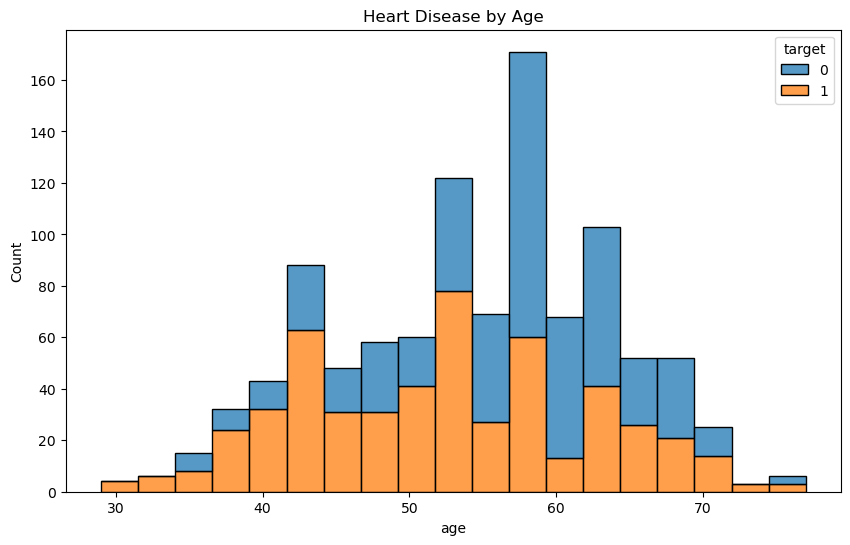

In [10]:
# Step 6: Data Visualization
# Distribution of heart disease by age
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='target', multiple='stack')
plt.title('Heart Disease by Age')
plt.show()

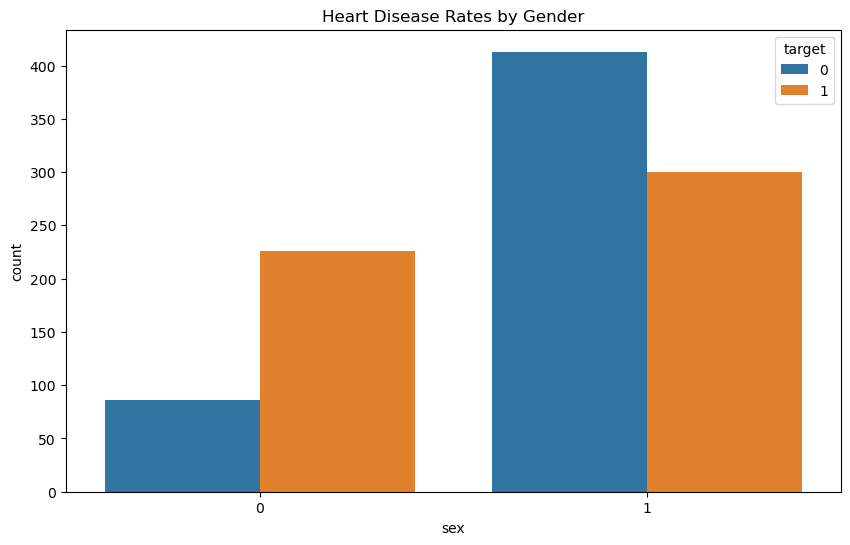

In [11]:
# Heart disease rates by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='sex', hue='target')
plt.title('Heart Disease Rates by Gender')
plt.show()

In [12]:
# Summary statistics
print(data_cleaned.describe())

             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.4

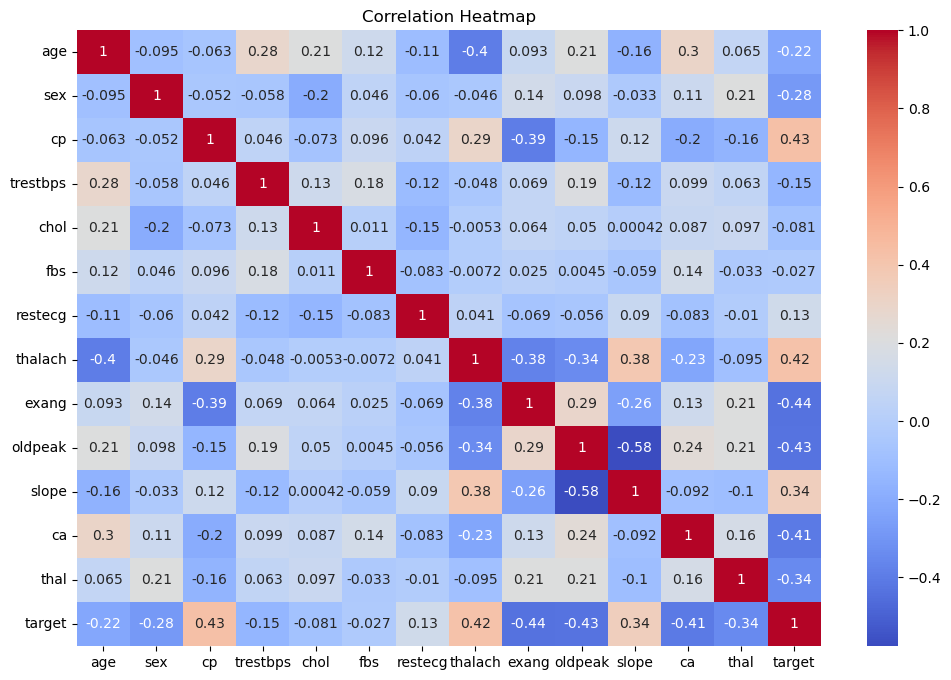

In [13]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


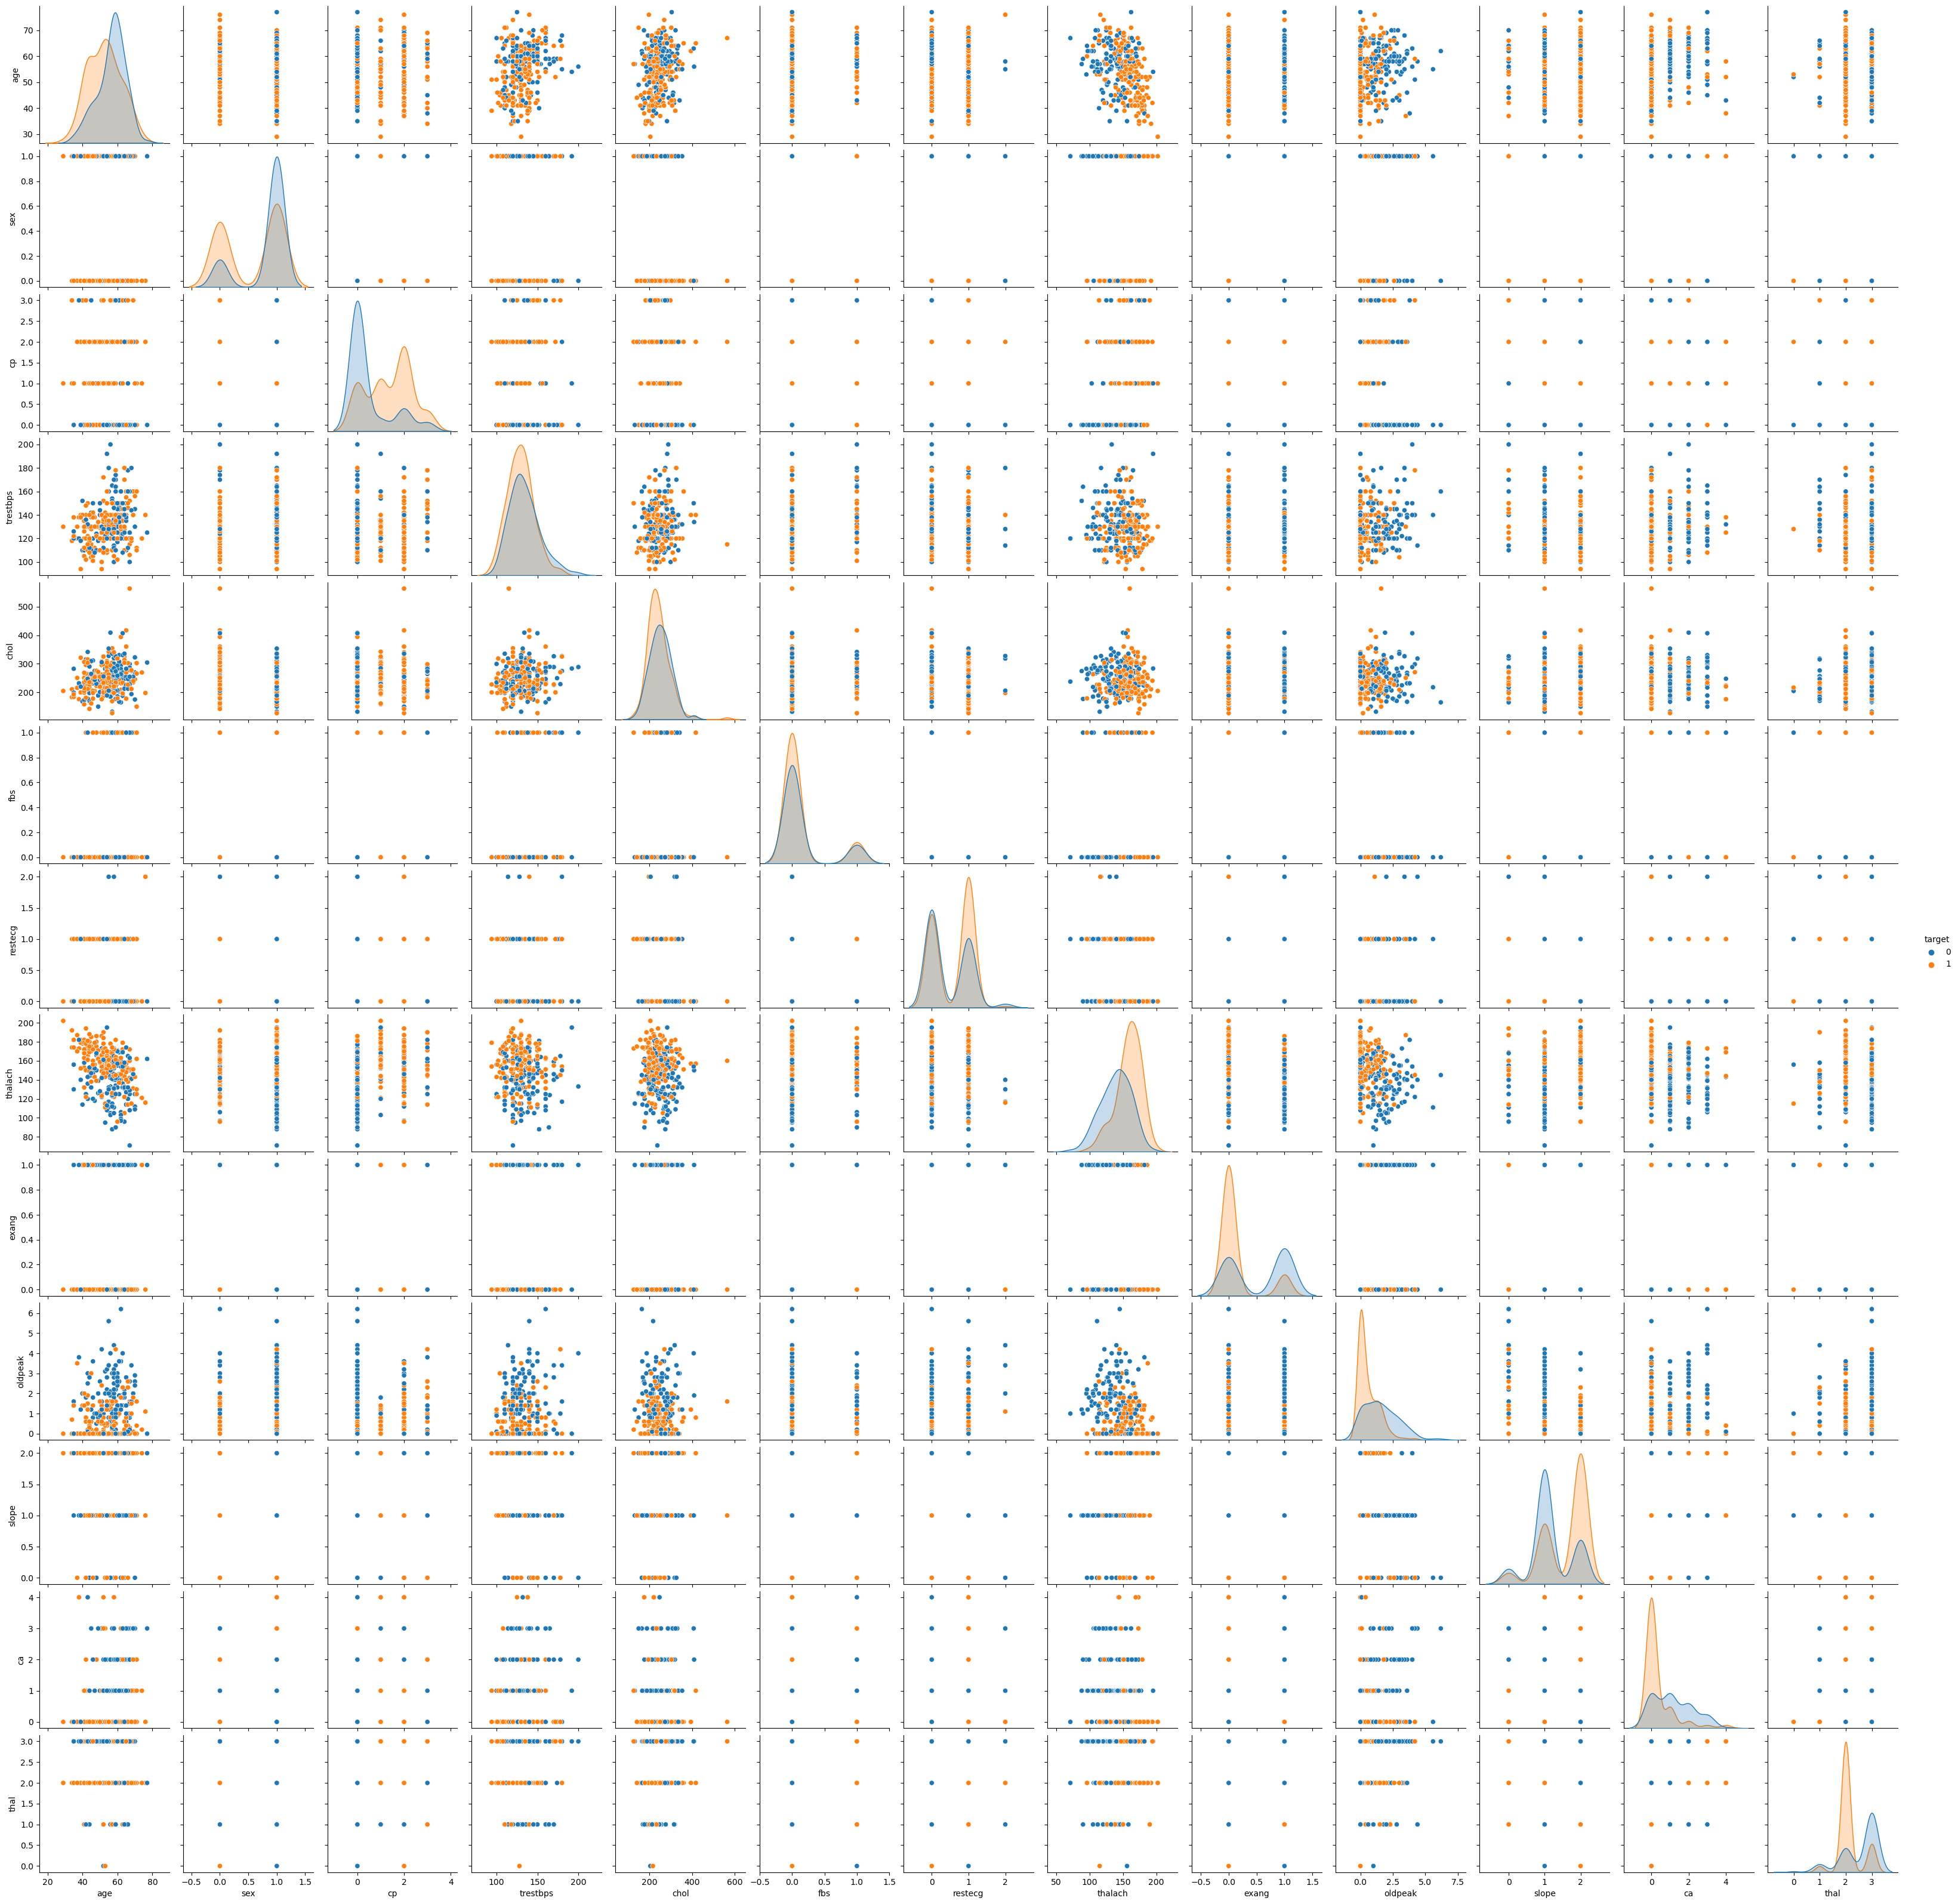

In [14]:
# Pairplot
sns.pairplot(data_cleaned, hue='target')
plt.show()

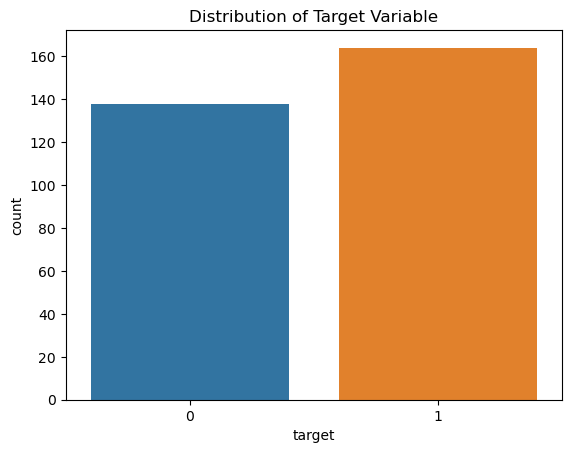

In [15]:
# Distribution of target variable
sns.countplot(x='target', data=data_cleaned)
plt.title('Distribution of Target Variable')
plt.show()

In [16]:
# Step 7: Model Training
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)


In [17]:
# Initialize and train models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.78      0.86      0.82        29

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.59      0.68        32
           1       0.65      0.83      0.73        29

    accuracy                           0.70        61
   macro avg       0.72      0.71      0.70        61
weighted avg       0.72      0.70      0.70        61

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        32
           1       0.82      0.93      0.87        29

    accuracy                           0.87        61
   macro av

In [18]:
# Example model: Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [20]:
# Step 8: Model Evaluation
# Predict on test set
y_pred = rf_model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.79      0.90      0.84        29

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



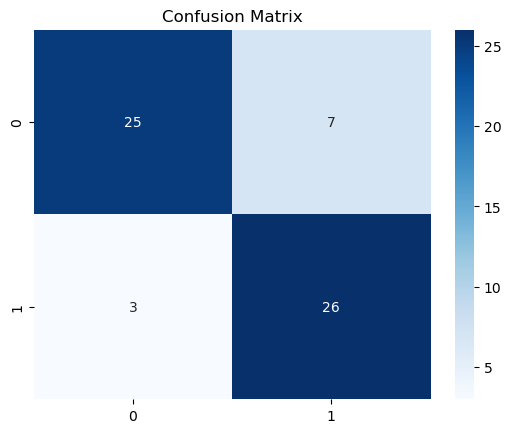

In [21]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [22]:
# ROC-AUC
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

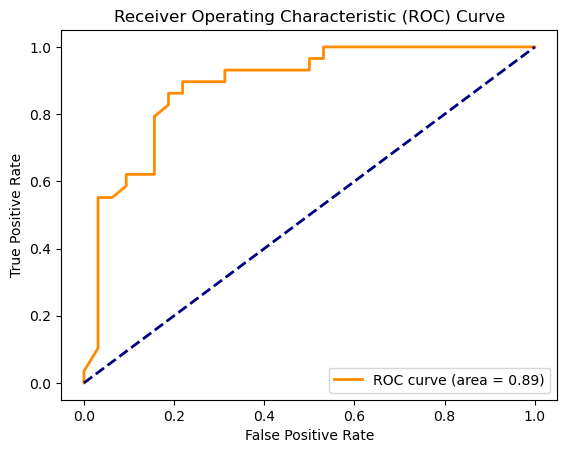

In [23]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [24]:
# Feature Importances
importances = rf_model.feature_importances_
numerical_features_names = numerical_features
categorical_features_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_features)

# Combine the feature names
feature_names = list(numerical_features_names) + list(categorical_features_names)

# Display feature importances
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
top_features = feature_importances.sort_values(by='importance', ascending=False).head(10)

print(top_features)


     feature  importance
28    thal_2    0.113163
3    thalach    0.103040
4    oldpeak    0.086874
7       cp_0    0.086099
0        age    0.069847
21      ca_0    0.069774
2       chol    0.063286
1   trestbps    0.062385
29    thal_3    0.058445
20   slope_2    0.035015


In [ ]:
# Step 9: Hyperparameter Tuning
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Best estimator
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
